In [1]:
#Para instalar el modulo pmgpy que nos permite trabajar con modelos
#graficos se debe descomentar la siguiente linea:
#!pip install pgmpy

#Importamos librerias útiles
#Para trabajar con redes bayesianas
from pgmpy.models import BayesianModel
#Para definir valores de probabilidad
from pgmpy.factors.discrete import TabularCPD
#Para realizar el método de eliminacion de variables
from pgmpy.inference import VariableElimination
#numpy
import numpy as np

#Instanciamos un elemento de la clase BayesianModel
redBayesiana = BayesianModel()

### La red a definir y sus respectivas probabilidades se muestran en la siguiente imagen

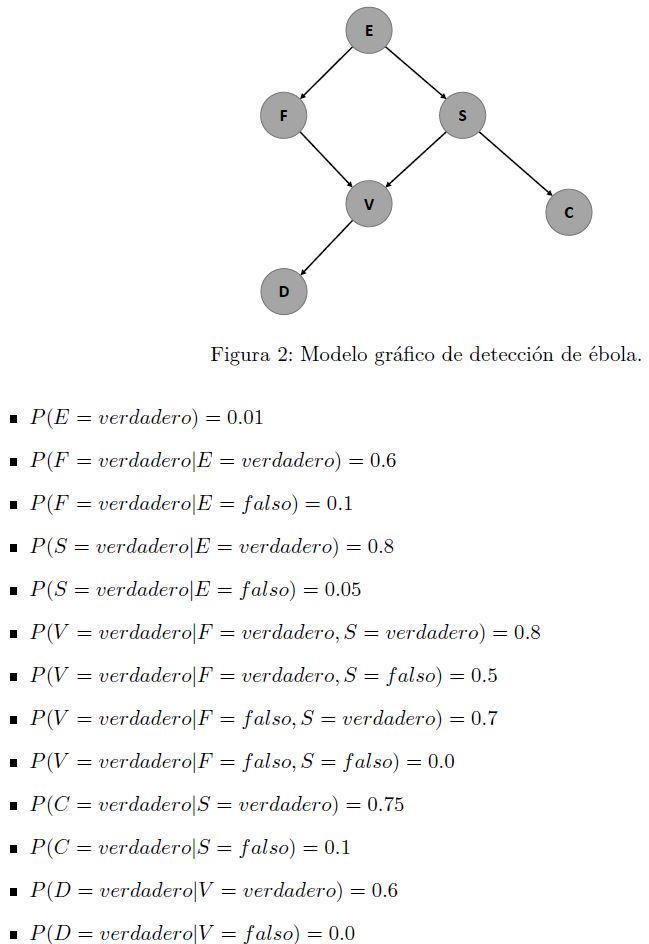

In [2]:
#Agregamos los nodos
#Para agregar los nodos usamos el metodo de la clase BayesianModel
#add_node('nombre_nodo')
redBayesiana.add_node('E')
redBayesiana.add_node('F')
redBayesiana.add_node('S')
redBayesiana.add_node('V')
redBayesiana.add_node('C')
redBayesiana.add_node('D')

#Agregamos las aristas que conectan a los nodos usando el
#metodo de la clase BayesianModel
#add_edge('nodoInicial', 'nodoFinal')
redBayesiana.add_edge('E','F')
redBayesiana.add_edge('E','S')
redBayesiana.add_edge('F','V')
redBayesiana.add_edge('S','V')
redBayesiana.add_edge('S','C')
redBayesiana.add_edge('V','D')

In [3]:
#creamos variables que almacenan las probabilidades a cada nodo usando el metodo TabularCPD()
probaE = TabularCPD(variable='E',variable_card=2,values=[[0.01],[0.99]])
probaF = TabularCPD(variable='F',variable_card=2,values=[[0.6,0.1], [0.4, 0.9]],evidence=['E'],evidence_card=[2])
probaS = TabularCPD(variable='S',variable_card=2,values=[[0.8,0.05],[0.2, 0.95]],evidence=['E'],evidence_card=[2])
probaV = TabularCPD(variable='V',variable_card=2,values=[[0.8,0.5,0.7,0.0],[0.2,0.5,0.3,1.0]],evidence=['F','S'],evidence_card=[2,2])
probaC = TabularCPD(variable='C',variable_card=2,values=[[0.75,0.1],[0.25,0.9]],evidence=['S'],evidence_card=[2])
probaD = TabularCPD(variable='D',variable_card=2,values=[[0.6,0.0],[0.4,1.0]],evidence=['V'],evidence_card=[2])

In [4]:
#Asignamos a cada nodo el valor de la probabilidad usando las variables previamente creadas
#usando el metodo add_cpds (conditional probability distributions)
redBayesiana.add_cpds(probaE,probaF,probaS,probaV,probaC,probaD)

In [5]:
#Verificamos que la red este bien instanciada con sus distribuciones de probabilidad condicionales.
#si no se pasan los valores de cpds al modelo. La siguiente linea de codigo lanzara un error
redBayesiana.check_model()

True

In [6]:
#Instanciamos la eliminacion de variables sobre nuestra red
Inferencia = VariableElimination(redBayesiana)

#Hacemos inferencia de la probabilidad P(E=falso|D=verdadero)
#donde debido al orden que se colocaron los valores de P. Verdadero=0 y falso=1
EFdadoDV = Inferencia.query(variables=['E'],evidence={'D':0})
print(EFdadoDV)
print("P(E=Falso| D=verdadero)=", EFdadoDV.values[1])

Eliminating: C: 100%|██████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1002.70it/s]

+------+----------+
| E    |   phi(E) |
+======+==========+
| E(0) |   0.0752 |
+------+----------+
| E(1) |   0.9248 |
+------+----------+
P(E=Falso| D=verdadero)= 0.9248171074845245


Por lo que $P(E=falso|D=verdadero)=P(E=1|D=0)=0.93$

In [7]:
#Ahora hagamos la inferencia del ejercicio opcional
#P(V|E=Verdadero)
VdadoEV = Inferencia.query(variables=['V'],evidence={'E':0})
print(VdadoEV)
print("P(V=verdadero| E=verdadero)=", VdadoEV.values[0])
print("P(V=Falso| E=verdadero)=", VdadoEV.values[1])

Eliminating: D: 100%|██████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1002.70it/s]

+------+----------+
| V    |   phi(V) |
+======+==========+
| V(0) |   0.6680 |
+------+----------+
| V(1) |   0.3320 |
+------+----------+
P(V=verdadero| E=verdadero)= 0.668
P(V=Falso| E=verdadero)= 0.332


Por lo que $P(V=verdadero|E=verdadero)=P(V=0|E=0)=0.67$ y $P(V=falso|E=verdadero)=P(V=1|E=0)=0.33$

### este codigo se escribió con ayuda de las siguientes paginas web:
* http://anmolkapoor.in/2019/05/05/Inference-Bayesian-Networks-Using-Pgmpy-With-Social-Moderator-Example/
* https://pgmpy.org/models.html#module-pgmpy.models.BayesianModel